# >>SuperMarket_Sales_Anlaysis

In [1]:
#let import the necessarry library 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
#READ THE DATA

df=pd.read_csv(r'C:\\Users\\HP\Downloads\archive (3)\supermarket_sales - Sheet1.csv')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [3]:
#WE IMPORT SKECTH SO AS TO GIVE A DETAIL ABOUT THE DATASET

import sketch


df.sketch.ask('tell us about the dataset ?')

In [4]:
#ASKING THE AI SKETCH TO TELL ME WHAT EXACTLLY EACH COLUMNS REPRESENT? 

df.sketch.ask('can you give me a friendly names and single sentence descriptions of each column ?(format output as HTML List)')

In [5]:
#the shape of the dataset!!!

shape=df.shape

print(f'**The Dataset is made of {shape[0]} rows and {shape[1]} columns**')

**The Dataset is made of 1000 rows and 17 columns**


Text(0.5, 1.0, 'The Data Type of the Supermarket Data is made of?')

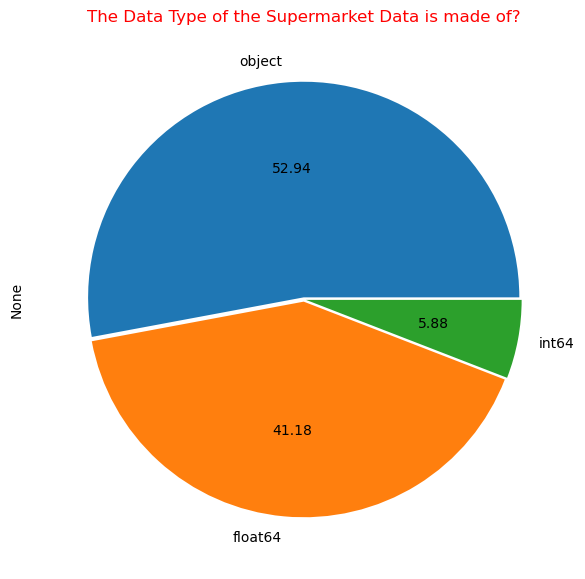

In [6]:
#checking the data tyype our dataset is made up?

df.dtypes.value_counts().plot.pie(figsize=(12,7),explode=[0.01,0.01,0.01],autopct='%1.2f')
plt.title('The Data Type of the Supermarket Data is made of?',color='red')

>Supermarket Dataset is made of 3 data type name float, int and object.

>The Object is represent teh categorica data type

>The FLoat represent decimal Number while the kint represent the whole Number.

In [7]:
#let view the data

df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


>Data Sanity cHECK

In [8]:
#ckecking for missing columns


df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [9]:
#converting the date data type to date

df['Date']=pd.to_datetime(df['Date'],errors='coerce')

In [10]:
#for confirmation 

type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
#checking the data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [12]:
#creating a def function to work alone the analysis

def table(df):
    for col in df:
        if df[col].dtypes=='object': # CALLING THE DATA TYPE
            print(f"{col}:{df[col].unique()}") 

In [13]:
table(df)

Invoice ID:['750-67-8428' '226-31-3081' '631-41-3108' '123-19-1176' '373-73-7910'
 '699-14-3026' '355-53-5943' '315-22-5665' '665-32-9167' '692-92-5582'
 '351-62-0822' '529-56-3974' '365-64-0515' '252-56-2699' '829-34-3910'
 '299-46-1805' '656-95-9349' '765-26-6951' '329-62-1586' '319-50-3348'
 '300-71-4605' '371-85-5789' '273-16-6619' '636-48-8204' '549-59-1358'
 '227-03-5010' '649-29-6775' '189-17-4241' '145-94-9061' '848-62-7243'
 '871-79-8483' '149-71-6266' '640-49-2076' '595-11-5460' '183-56-6882'
 '232-16-2483' '129-29-8530' '272-65-1806' '333-73-7901' '777-82-7220'
 '280-35-5823' '554-53-8700' '354-25-5821' '228-96-1411' '617-15-4209'
 '132-32-9879' '370-41-7321' '727-46-3608' '669-54-1719' '574-22-5561'
 '326-78-5178' '162-48-8011' '616-24-2851' '778-71-5554' '242-55-6721'
 '399-46-5918' '106-35-6779' '635-40-6220' '817-48-8732' '120-06-4233'
 '285-68-5083' '803-83-5989' '347-34-2234' '199-75-8169' '853-23-2453'
 '877-22-3308' '838-78-4295' '109-28-2512' '232-11-3025' '382-03-4

In [14]:
#Dropping the Time columnss.

df=df.drop('Time',axis=1)

In [15]:
#checking for the Uniqueness of the dataset.

for i in df.columns:
        print('the Uniquness of Each columns are {}: {}'.format(i,df[i].nunique()))

the Uniquness of Each columns are Invoice ID: 1000
the Uniquness of Each columns are Branch: 3
the Uniquness of Each columns are City: 3
the Uniquness of Each columns are Customer type: 2
the Uniquness of Each columns are Gender: 2
the Uniquness of Each columns are Product line: 6
the Uniquness of Each columns are Unit price: 943
the Uniquness of Each columns are Quantity: 10
the Uniquness of Each columns are Tax 5%: 990
the Uniquness of Each columns are Total: 990
the Uniquness of Each columns are Date: 89
the Uniquness of Each columns are Payment: 3
the Uniquness of Each columns are cogs: 990
the Uniquness of Each columns are gross margin percentage: 1
the Uniquness of Each columns are gross income: 990
the Uniquness of Each columns are Rating: 61


In [16]:
#the creating adefine function for it.


def cols(df):
    for i in df.columns:
        print('the Uniquness of Each columns are {}: {}'.format(i,df[i].nunique()))

In [17]:
cols(df)

the Uniquness of Each columns are Invoice ID: 1000
the Uniquness of Each columns are Branch: 3
the Uniquness of Each columns are City: 3
the Uniquness of Each columns are Customer type: 2
the Uniquness of Each columns are Gender: 2
the Uniquness of Each columns are Product line: 6
the Uniquness of Each columns are Unit price: 943
the Uniquness of Each columns are Quantity: 10
the Uniquness of Each columns are Tax 5%: 990
the Uniquness of Each columns are Total: 990
the Uniquness of Each columns are Date: 89
the Uniquness of Each columns are Payment: 3
the Uniquness of Each columns are cogs: 990
the Uniquness of Each columns are gross margin percentage: 1
the Uniquness of Each columns are gross income: 990
the Uniquness of Each columns are Rating: 61


>Data Sanity Check ✅✅✅

Explorative Data Analysis 

In [18]:
#WritING Short note about the Stores

Branches=df['Branch'].nunique()
City=df['City'].nunique()
operated=df['City'].unique()
brach=df['Branch'].unique()

print(f'The Stores has {Branches} Branches, \nAnd operated in {City} city,\nThe City the Store Operated in :{operated}, \nnd Each Store is name has {brach}.')

The Stores has 3 Branches, 
And operated in 3 city,
The City the Store Operated in :['Yangon' 'Naypyitaw' 'Mandalay'], 
nd Each Store is name has ['A' 'C' 'B'].


<AxesSubplot:title={'center':'Custumer Type'}, ylabel='Customer type'>

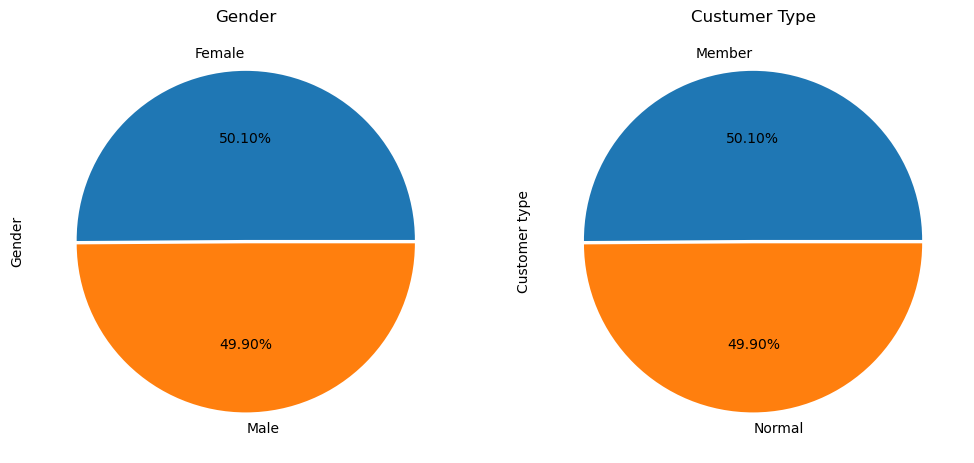

In [19]:
#plotting out the characters, 

fig,ax=plt.subplots(1,2)
df['Gender'].value_counts().plot(kind='pie',explode=[0.01,0.01],figsize=(12,7),title='Gender',autopct='%1.2f%%',ax=ax[0])
df['Customer type'].value_counts().plot(kind='pie',explode=[0.01,0.01],figsize=(12,7),title='Custumer Type',autopct='%1.2f%%',ax=ax[1])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'ProductLine By Custumer Type')

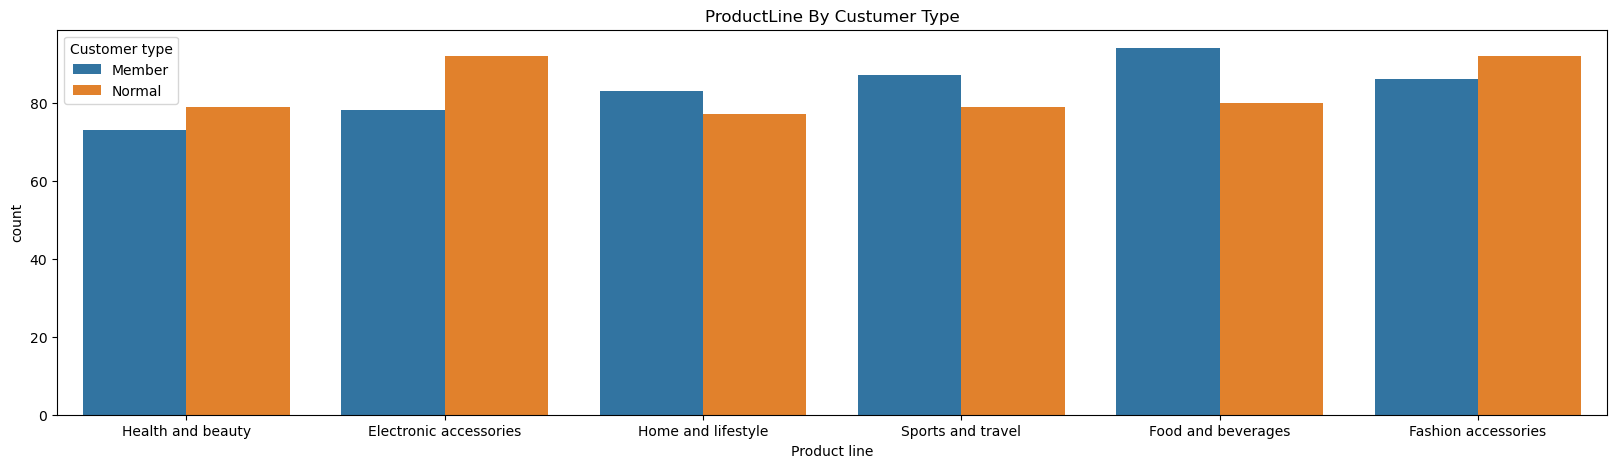

In [20]:
#plotting out thhe characters

plt.figure(figsize=(20,5),dpi=100)
sns.countplot(df['Product line'],hue=df['Customer type'])
plt.title('ProductLine By Custumer Type')

In [21]:
cols(df)

the Uniquness of Each columns are Invoice ID: 1000
the Uniquness of Each columns are Branch: 3
the Uniquness of Each columns are City: 3
the Uniquness of Each columns are Customer type: 2
the Uniquness of Each columns are Gender: 2
the Uniquness of Each columns are Product line: 6
the Uniquness of Each columns are Unit price: 943
the Uniquness of Each columns are Quantity: 10
the Uniquness of Each columns are Tax 5%: 990
the Uniquness of Each columns are Total: 990
the Uniquness of Each columns are Date: 89
the Uniquness of Each columns are Payment: 3
the Uniquness of Each columns are cogs: 990
the Uniquness of Each columns are gross margin percentage: 1
the Uniquness of Each columns are gross income: 990
the Uniquness of Each columns are Rating: 61


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


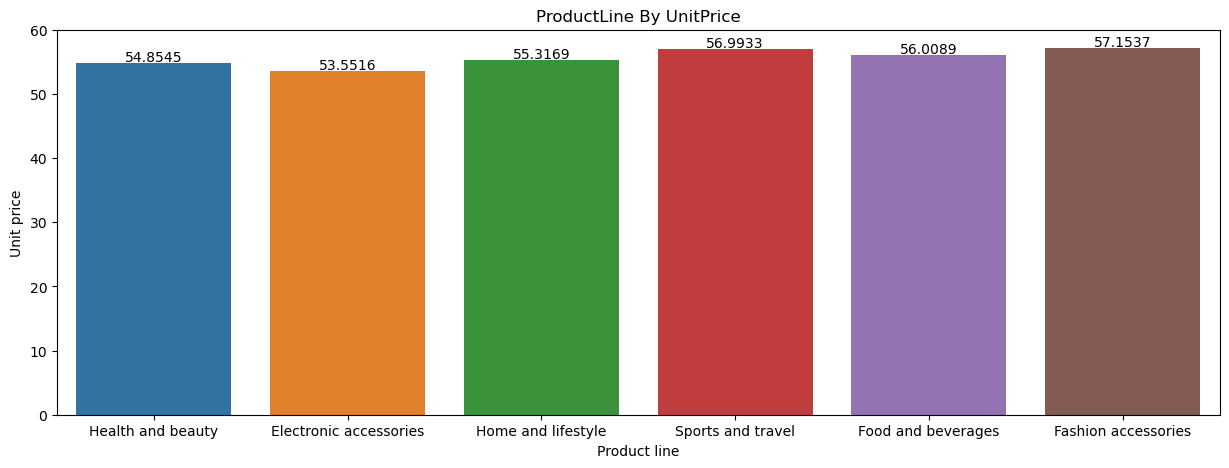

In [22]:
#plotting to see the Product Line by Unit Price

plt.figure(figsize=(15,5),dpi=100)
fig=sns.barplot(df['Product line'],y=df['Unit price'],ci=None)
plt.title('ProductLine By UnitPrice')

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=-1)

> The UnitPrice for ElectronicsAccessories Are the Lowest Price.
> while for FashionAccessories is the higestPrice.

In [23]:
#Extracting The Month name From the date

df['Month']=pd.DatetimeIndex(df['Date']).month_name()

In [24]:
#for confirmation 

df.sample()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating,Month
83,787-56-0757,C,Naypyitaw,Member,Female,Food and beverages,80.36,4,16.072,337.512,2019-02-23,Credit card,321.44,4.761905,16.072,8.3,February


In [25]:
df['Month'].unique()   #the month Uniqueness

array(['January', 'March', 'February'], dtype=object)

In [26]:
#which Month we have more Sales ?


data=df.set_index(df['Date'])

In [27]:
#to calculate the monthly sales

(data.assign(Monthly_Sales=data['Total'])).resample('M')['Total'].sum()

Date
2019-01-31    116291.868
2019-02-28     97219.374
2019-03-31    109455.507
Freq: M, Name: Total, dtype: float64

> That is to Say we only have  data for 3 Month.
Jaunary Sales is the top Sales.

In [28]:
#let Get Daily Sales 

(data.assign(Daily_Sales=data['Total'])).resample('D')['Total'].sum().sort_values(ascending=False)[:10]

Date
2019-03-09    7474.0470
2019-02-07    7228.2105
2019-03-14    7214.6340
2019-02-15    6830.7855
2019-03-02    6560.3055
2019-03-05    6230.8785
2019-01-23    5994.1875
2019-01-15    5944.2600
2019-02-27    5859.4515
2019-03-19    5740.3920
Name: Total, dtype: float64

> On The 09 March, 2019 that when we have the stores recorded Top Daily sales from january to March.

In [29]:
(data.assign(Daily_Sales=data['Total'])).resample('D')['Total'].sum().sort_values(ascending=True)[:5]

Date
2019-02-13     934.2375
2019-03-18    1292.8335
2019-02-21    1393.7385
2019-03-07    1438.2585
2019-02-18    1496.0295
Name: Total, dtype: float64

> > On The 13 March, 2019 that when we have the stores recorded Low Daily sales

In [30]:
df.describe()   # descriptive statistics

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [31]:
#Let Get The Custumer Who pay more taxes from the goods gotten from the store?

def max_min (X):
    minindex=df[X].idxmin()
    maxindex=df[X].idxmax()
    maxi=pd.DataFrame(df.loc[maxindex,:])
    mini=pd.DataFrame(df.loc[minindex,:])
    return pd.concat([maxi,mini],axis=1)



max_min('Tax 5%')

,350,822
Invoice ID,860-79-0874,784-21-9238
Branch,C,C
City,Naypyitaw,Naypyitaw
Customer type,Member,Member
Gender,Female,Male
Product line,Fashion accessories,Sports and travel
Unit price,99.3,10.17
Quantity,10,1
Tax 5%,49.65,0.5085
Total,1042.65,10.6785


> On 2019-02-15 is day the store recorded Who pay Most taxes in the store.
Custumer who pay Most Taxes is not The same as custumer whho brought plenty items or have the higest rating.
but is the custumers who buy the most

In [32]:
cols(df)

the Uniquness of Each columns are Invoice ID: 1000
the Uniquness of Each columns are Branch: 3
the Uniquness of Each columns are City: 3
the Uniquness of Each columns are Customer type: 2
the Uniquness of Each columns are Gender: 2
the Uniquness of Each columns are Product line: 6
the Uniquness of Each columns are Unit price: 943
the Uniquness of Each columns are Quantity: 10
the Uniquness of Each columns are Tax 5%: 990
the Uniquness of Each columns are Total: 990
the Uniquness of Each columns are Date: 89
the Uniquness of Each columns are Payment: 3
the Uniquness of Each columns are cogs: 990
the Uniquness of Each columns are gross margin percentage: 1
the Uniquness of Each columns are gross income: 990
the Uniquness of Each columns are Rating: 61
the Uniquness of Each columns are Month: 3


Text(0, 0.5, '')

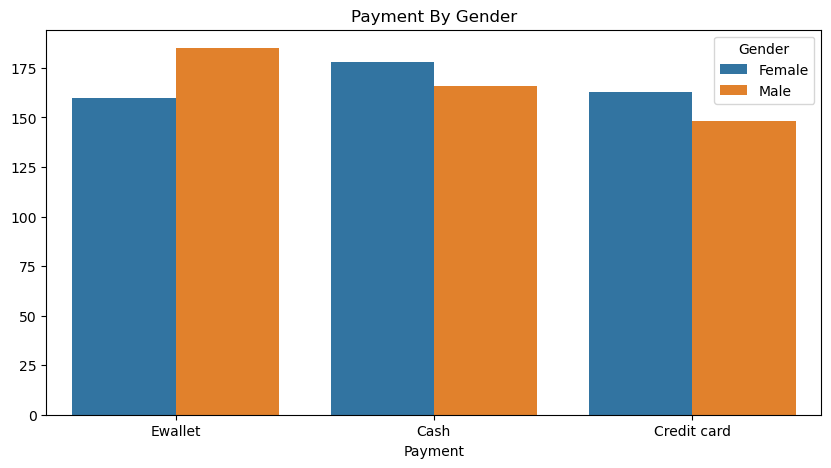

In [33]:
#let us chck the Most Means of payment?


plt.figure(figsize=(10,5),dpi=100)
sns.countplot(data=df,x='Payment',hue='Gender')
plt.title('Payment By Gender')
plt.ylabel('')

The Means of Payment custumer used the most is Ewallet, female used it the most while CASH means of payment MALE used it the most.

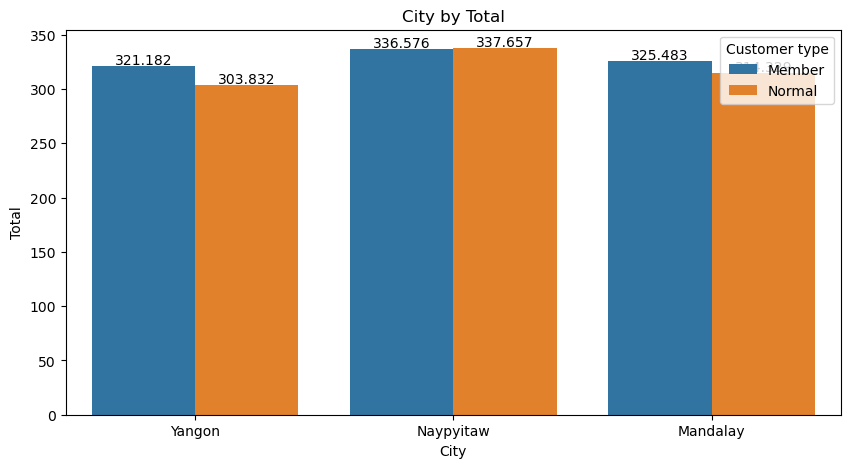

In [34]:
#PLOTTING OUT OUT CUSTUMER TYPES BY CITY


plt.figure(figsize=(10,5),dpi=100)
fig=sns.barplot(data=df,x='City',y='Total',hue='Customer type',ci=None)
plt.title('City by Total')

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=-1)

> In the city of Yangon member gat more Sales.
> In The City of Madalay The Member also gat More Sales
> lastly in the city of NAyoyitaw The member and The Reaguler contribute equally to the sales.

In [35]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,4.761905,26.1415,9.1,January
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,Cash,76.40,4.761905,3.8200,9.6,March
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,4.761905,16.2155,7.4,March
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,4.761905,23.2880,8.4,January
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,Ewallet,604.17,4.761905,30.2085,5.3,February


In [36]:
df.groupby('Product line')['Total'].agg({'mean','max','min'})

,mean,min,max
Product line,,,
Electronic accessories,319.632538,26.7225,942.4485
Fashion accessories,305.089298,12.6945,1042.6500
Food and beverages,322.671517,22.6590,1034.4600
Health and beauty,323.643020,18.6375,950.2500
Home and lifestyle,336.636956,14.6790,1023.7500
Sports and travel,332.065220,10.6785,1002.1200


the minimum unit price of item in stock is Sports and travel.

In [37]:
df.groupby('Product line')['Unit price'].agg({'mean','max','min'})

,mean,min,max
Product line,,,
Electronic accessories,53.551588,10.56,99.73
Fashion accessories,57.153652,10.18,99.89
Food and beverages,56.008851,10.13,99.79
Health and beauty,54.854474,10.08,99.96
Home and lifestyle,55.316937,10.53,99.92
Sports and travel,56.993253,10.17,99.96


the minimum unit price of item in stock is Electronic and Accessories

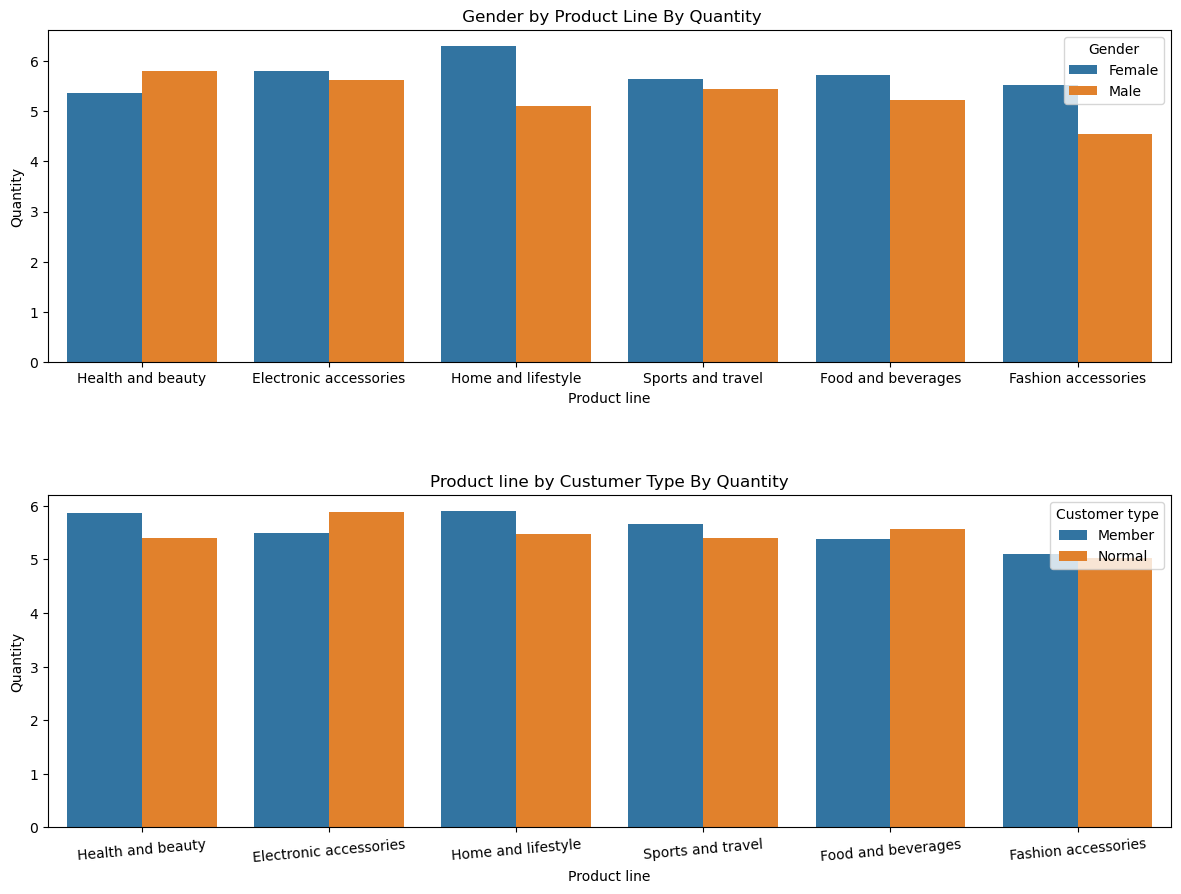

In [38]:
#let check the custumer who brought The Quantity

fig,ax=plt.subplots(2,1,figsize=(13,10),dpi=100)
sns.barplot(data=df,x='Product line',y='Quantity',hue='Gender',ci=None,ax=ax[0])
ax[0].set_title(' Gender by Product Line By Quantity')
sns.barplot(data=df,x='Product line',y='Quantity',hue='Customer type',ci=None,ax=ax[1])
ax[1].set_title('Product line by Custumer Type By Quantity')

fig.tight_layout(pad=5)
plt.xticks(rotation=5);

>> The memeber of the Company are major of the custumers who patronage the copany The most.
>> The Female Buy More thinGs from The companies.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Payment                  1000 non-null   object        
 12  cogs                     1000 non-n

In [72]:
#getting the SUM TOTAL OF EACH NUMRIAL COLUMNS

for i in df.select_dtypes('number'):
    print('total Sum of is {} :{}'.format(i,round(sum(df[i],2))))

total Sum of is Unit price :55674
total Sum of is Quantity :5512
total Sum of is Tax 5% :15381
total Sum of is Total :322969
total Sum of is cogs :307589
total Sum of is gross margin percentage :4764
total Sum of is gross income :15381
total Sum of is Rating :6975
